# Convolutional Neural Network

### Importing the libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import PIL
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.3.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'TLD_dataset-20201130T034909Z-001/TLD_dataset/training_set',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 512 images belonging to 3 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'TLD_dataset-20201130T034909Z-001/TLD_dataset/test_set',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 130 images belonging to 3 classes.


In [7]:
training_set.class_indices

{'green': 0, 'red': 1, 'yellow': 2}

In [ ]:
PIL.Image.open('TLD_dataset-20201130T034909Z-001/TLD_dataset/test_set/green/1133.jpg')

In [12]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(150, 
                                                              150,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

## Part 2 - Building the CNN

In [18]:
# Initializing CNN
cnn = tf.keras.models.Sequential()

cnn.add(data_augmentation)

# Convolution + Pooling (Set 1)

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolution + Pooling (Set 2)

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolution + Pooling (Set 3)
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Flattening
cnn.add(tf.keras.layers.Flatten())

#Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Final Output layer
cnn.add(tf.keras.layers.Dense(3, activation='softmax'))

## Part 3 - Training the CNN

In [19]:
# Compiling the CNN
cnn.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])

# Training the CNN on training_set and evaluating on test set
history=cnn.fit(x = training_set, validation_data = test_set, epochs = 10, shuffle = True)

Epoch 1/10
16/16 [==============================] - 13s 824ms/step - loss: 1.1301 - accuracy: 0.4121 - val_loss: 1.0495 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 12s 778ms/step - loss: 1.0307 - accuracy: 0.5078 - val_loss: 1.0099 - val_accuracy: 0.5000
Epoch 3/10
16/16 [==============================] - 13s 812ms/step - loss: 1.0210 - accuracy: 0.5078 - val_loss: 0.9867 - val_accuracy: 0.5000
Epoch 4/10
16/16 [==============================] - 13s 817ms/step - loss: 0.9891 - accuracy: 0.5098 - val_loss: 1.0993 - val_accuracy: 0.5000
Epoch 5/10
16/16 [==============================] - 13s 796ms/step - loss: 0.9560 - accuracy: 0.5352 - val_loss: 0.8951 - val_accuracy: 0.6308
Epoch 6/10
16/16 [==============================] - 13s 801ms/step - loss: 0.9238 - accuracy: 0.5469 - val_loss: 1.0088 - val_accuracy: 0.6308
Epoch 7/10
16/16 [==============================] - 13s 842ms/step - loss: 0.8604 - accuracy: 0.6035 - val_loss: 1.0745 - val_accuracy: 0.6308

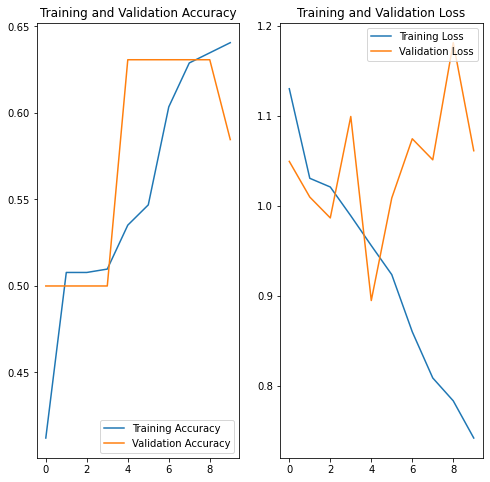

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Part 4 - Single Prediction

In [16]:
training_set.class_indices

{'green': 0, 'red': 1, 'yellow': 2}

In [22]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('TLD_dataset-20201130T034909Z-001/TLD_dataset/single_prediction/left0273.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)

[[1. 0. 0.]]
